# PCA on part 41

### Load library

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, KMeans
import matplotlib.pyplot as plt
import seaborn as sns                        
%matplotlib inline
pd.set_option('display.max_columns', 200)

### Read part 41 data and inspect the data

In [4]:
part_41 = pd.read_csv('part-00000-tid-5216496021337371647-401f8217-c775-41bf-83b7-c317bf8c567e-0-c000.csv')
part_41.head(5)

C:\Users\liyadi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (129,134,137,138,140,144,145,147,150,151,153,154,158,160,161,163,166,167,169,172,173,175,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,F3413,F3415,FILLER_1,F10579,F10677,F3411,F6311,F876,F3435,F4496,F862,F863,F4448,F4449,F4451,F4450,F4366,F14592,F14593,FILLER_2,F3434,F986,F957,F877,F3430,FILLER_3,F10105,F866,F867,F6676,F6664,F6665,F6677,F6667,F6666,F6678,F6668,F6669,F6679,F6671,F6670,F6680,F6672,F6673,F6681,F6675,F6674,F6682,F995,F994,F993,F992,F991,F990,F989,F988,F1003,F1002,F1001,F1000,F999,F998,F997,F996,F1011,F1010,F1009,F1008,F1007,F1006,F1005,F1004,F1019,F1018,FILLER_4,F319,F439,F318,F438,F4797,F4740,F8200,F7504,F5558,F14675,F466,F3425,F4790,F3493,F3491,F3416,F3472,F10710,F10590,F11121,F3463,F3464,F3470,F3468,F3466,...,F7083,F7084,F7085,F7086,F7087,F7088,F7089,F7090,F7091,F7092,F7093,F7094,F7095,F7096,F7097,F7098,F7099,F7100,F7101,F4712,F4713,F4714,F4715,F4716,F4721,F4722,F4725,F4726,F4727,F4728,F4729,F4732,F4733,F4734,F4735,F4736,F4737,F4738,F4739,F4742,F4743,F4744,F4745,F4746,F4747,F4748,F4749,F4750,F4751,F4752,F4753,F4754,F4755,F4756,F4757,F4758,F4759,F4760,F4761,F4762,F4763,F4764,F4765,F4766,F4767,F4768,F4769,F4770,F4771,F4772,F4773,F9100,F9101,F9102,F9103,F9104,F9105,F9106,F9107,F9108,F9109,F9110,F9111,F9112,F9113,F9114,F9115,F9116,F9117,F9118,F9119,F9120,F9121,F9122,F9123,F9124,geohash,latitude,longitude,id
0,1955985703,351889600,NaN,NaN,R,1,A,S,101,H,50,54,0,0,106,80,4,53,E,NaN,N,U,U,12,20110809.0,NaN,1,1,0,5U,5N,5,NaN,5N,7,NaN,5N,8,NaN,5U,8,NaN,5N,2,NaN,5N,4,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,J36,J36,F,F,B,1,4,2,44140.0,A,0,0,U,243,20040225.0,NaN,0,0,5.0,2004.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,22,12,19,31,18,13,14,24,23,16,18,21,24,27,24,27,18,19,27,53,28,33,22,43,16,20,14,26,15,31,23,24,11,13,30,12,24,26,16,40,35,34,22,16,19,22,04,19,16,14,19,19,65.0,9.0,5.0,13.0,4.0,7.0,5.0,22.0,18.0,15.0,11.0,8.0,13.0,1.0,5.0,3.0,5.0,79.0,15.0,2.0,9.0,2.0,13.0,4.0,34.0,drkr7p,42.096863,-72.636108,352187318272
1,2183816029,527353886,NaN,NaN,T,1,A,S,9,T,73,79,0,0,178,135,4,89,F,NaN,N,U,U,6,20100514.0,NaN,2,1,1,1Y,5N,2,NaN,5U,24,NaN,1Y,101,U,5U,7,NaN,5N,2,NaN,5N,4,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,I31,J36,F,F,E,2,16,2,44140.0,A,6,0,U,0,NaN,NaN,0,0,5.0,2010.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,42,29,35,65,45,29,37,47,49,37,40,40,43,46,42,53,34,38,42,49,23,53,56,24,38,40,39,51,43,87,57,49,37,42,57,37,53,25,44,33,59,39,66,43,48,61,04,47,42,08,47,47,64.0,9.0,6.0,14.0,4.0,7.0,4.0,22.0,18.0,16.0,12.0,8.0,13.0,1.0,5.0,4.0,5.0,81.0,15.0,2.0,10.0,1.0,12.0,5.0,35.0,drkr7u,42.080383,-72.603149,352187318273
2,2228890070,575407357,NaN,NaN,T,1,A,S,14,T,90,93,0,0,288,218,4,144,H,NaN,N,U,U,6,20101025.0,NaN,1,1,0,5U,5N,2,NaN,5N,10,NaN,5N,8,NaN,5U,5,NaN,5N,5,NaN,5N,4,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,O51,J36,F,F,B,1,4,2,44140.0,A,4,0,U,0,NaN,NaN,0,0,5.0,2010.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,23,17,20,22,24,43,32,69,33,20,25,34,36,40,32,31,28,34,37,47,30,38,34,52,25,29,13,27,14,22,20,26,07,17,28,11,24,24,12,40,31,35,28,17,21,15,03,22,18,14,20,18,66.0,9.0,6.0,14.0,4.0,7.0,4.0,23.0,18.0,15.0,11.0,7.0,13.0,1.0,5.0,3.0,5.0,80.0,15.0,2.0,10.0,2.0,13.0,5.0,36.0,drkr7u,42.080383,-72.603149,352187318274
3,2323632413,630334342,NaN,NaN,T,1,A,S,101,H,76,81,0,0,188,142,4,94,F,NaN,N,U,U,4,20120404.0,NaN,1,1,0,5N,5N,1,NaN,5N,1,NaN,5N,1,NaN,5N,1,NaN,5N,1,NaN,5N,2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,L42,J36,I,F,A,1,5,2,44140.0,A,0,0,U,515,20120404.0,NaN,0,0,5.0,2012.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,34,30,24,38,33,47,42,33,45,32,39,49,45,50,35,48,32,36,37,52,39,40,35,18,52,38,44,50,48,51,49,52,36,40,56,37,56,29,43,37,51,24,54,40,45,61,05,45,48,09,49,52,65.0,9.0,4.0,13.0,4.0,7.0,4.0,22.0,16.0,15.0,11.0,8.0,13.0,1.0,5.0,3.0,5.0,82.0,15.0,2.0,10.0,2.0,13.0,5.0,35.0,drkr7u,42.080383,-72.603149,352187318275
4,2356498402,111851435,NaN,NaN,R,1,A,S,14,T,18,22,0,0,38,29,4,19,B,NaN,N,M,U,3,20141015.0,NaN,1,1,0,5N,5N,1,NaN,5N,1,NaN,5N,1,NaN,5N,1,NaN,5N,1,NaN,5N,1,NaN,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
part_41.dtypes

F3413          int64
F3415          int64
FILLER_1     float64
F10579       float64
F10677        object
F3411          int64
F6311         object
F876          object
F3435          int64
F4496         object
F862           int64
F863           int64
F4448          int64
F4449          int64
F4451          int64
F4450          int64
F4366          int64
F14592         int64
F14593        object
FILLER_2     float64
F3434         object
F986          object
F957          object
F877           int64
F3430        float64
FILLER_3     float64
F10105         int64
F866           int64
F867           int64
F6676         object
              ...   
F4773         object
F9100        float64
F9101        float64
F9102        float64
F9103        float64
F9104        float64
F9105        float64
F9106        float64
F9107        float64
F9108        float64
F9109        float64
F9110        float64
F9111        float64
F9112        float64
F9113        float64
F9114        float64
F9115        

In [6]:
part_41_num = part_41.select_dtypes(['number'])
part_41_num.dtypes

F3413          int64
F3415          int64
FILLER_1     float64
F10579       float64
F3411          int64
F3435          int64
F862           int64
F863           int64
F4448          int64
F4449          int64
F4451          int64
F4450          int64
F4366          int64
F14592         int64
FILLER_2     float64
F877           int64
F3430        float64
FILLER_3     float64
F10105         int64
F866           int64
F867           int64
F6665          int64
F6666          int64
F6669          int64
F6670          int64
F6673          int64
F6674          int64
F995           int64
F994           int64
F993           int64
              ...   
F7099          int64
F7100          int64
F9100        float64
F9101        float64
F9102        float64
F9103        float64
F9104        float64
F9105        float64
F9106        float64
F9107        float64
F9108        float64
F9109        float64
F9110        float64
F9111        float64
F9112        float64
F9113        float64
F9114        

In [17]:
print(sum(np.sum(part_41_lifestyle_char=='Y')))
print(sum(np.sum(part_41_lifestyle_char=='U')))

2571384
26260439


In [18]:
part_41_lifestyle_char.isnull().sum().sum()

10627327

In [8]:
print(part_41.latitude.min())
print(part_41.latitude.max())
print(part_41.longitude.min())
print(part_41.longitude.max())


38.932800293
47.3538208008
-76.9647216797
-66.9781494141


### Read verticals file

In [10]:
verticals = pd.read_csv('vertical.csv', header=None)
verticals.head()

,0,1,2
0,F10579,Demographics,Dwelling
1,F11344,Demographics,Geography
2,F10577,Demographics,Geography
3,F10677,Demographics,Geography
4,F3411,Demographics,Geography


In [11]:
verticals[1]=verticals[1].str.lower()
verticals[2]=verticals[2].str.lower()
verticals.head()

,0,1,2
0,F10579,demographics,dwelling
1,F11344,demographics,geography
2,F10577,demographics,geography
3,F10677,demographics,geography
4,F3411,demographics,geography


### selecting lifestyle columns and divide into numeric and categorical sets

In [12]:
lifestyle = verticals[verticals[1]=='lifestyle'][0]
len(lifestyle)

195

In [13]:
part_41_lifestyle = part_41[lifestyle]
part_41_lifestyle_num = part_41_lifestyle.select_dtypes(['number'])
part_41_lifestyle_char = part_41_lifestyle.select_dtypes(['object'])
print("numeric columns: {}".format(part_41_lifestyle_num.shape))
print("charactor columns: {}".format(part_41_lifestyle_char.shape))

numeric columns: (292290, 60)
charactor columns: (292290, 135)


In [14]:
# all these are model predicted likelyhood number
# note: 1=highest likelyhood, 99 = lowest likelyhood, 0 = unknown
print(part_41_lifestyle_num.head(15))
part_41_lifestyle_num.columns

    F14682  F16379  F14813  F16386  F16390  F16394  F16384  F14827  F16922  \
0       29      88      38      21      44      71      84      54      83   
1       44      66      48       4      18      72      88      78       8   
2       55      87      21      33      31      83      89      69      78   
3       55      62      79      64      63      58      47      78      45   
4       81      88      36      32      72      91      88      96       6   
5       55      86      21      36      64      72      88      56      56   
6       55      87      21      37      39      70      90      67      44   
7       71      77      39       9      29      78      87      84      77   
8       55      37      67      38      38      41      33      14      17   
9       68      28      26      50      48      32      40       9      99   
10      55      36      80      36      73      49      33      61      20   
11       0       0       0       0       0       0       0      

Index(['F14682', 'F16379', 'F14813', 'F16386', 'F16390', 'F16394', 'F16384',
       'F14827', 'F16922', 'F16377', 'F14684', 'F16381', 'F14708', 'F16378',
       'F14686', 'F14825', 'F14826', 'F16385', 'F16392', 'F16400', 'F16376',
       'F16399', 'F14687', 'F14688', 'F17214', 'F17216', 'F17208', 'F17209',
       'F17210', 'F17215', 'F17218', 'F17211', 'F17212', 'F17219', 'F17213',
       'F16388', 'F16389', 'F16401', 'F16391', 'F16383', 'F14828', 'F16395',
       'F16396', 'F16397', 'F16380', 'F16393', 'F16398', 'F16923', 'F14815',
       'F16402', 'F14685', 'F14683', 'F16921', 'F16928', 'F16924', 'F16925',
       'F16926', 'F16927', 'F16929', 'F16382'],
      dtype='object')

### checking if there is any missing values, seem to have no missingness

In [15]:
# missingness
# no missing value
part_41_lifestyle_num.isnull().values.any()

False

### although there is no missing value, there is 0 which means unknown. ~7% observations have unknown likelihood for all the lifesytle columns

In [16]:
print("total rows: {}".format(part_41_lifestyle_num.shape[0]))
np.sum(part_41_lifestyle_num == 0).head(20)

total rows: 292290


F14682    22081
F16379    22081
F14813    22081
F16386    22081
F16390    22081
F16394    22081
F16384    22081
F14827    22081
F16922    22081
F16377    22081
F14684    22081
F16381    22081
F14708    22081
F16378    22081
F14686    22081
F14825    22081
F14826    22081
F16385    22081
F16392    22081
F16400    22081
dtype: int64

### Preprocessing data 
 since all the columns here are on the same scale(0-99), scaleing the data is not necessary for PCA
 for likelihood, when 1=most likelihood, 99=least likelihood, unknown = 0 does not make sense. unknown is more likely than the most likelihood? Assuming the unknown are random, it make more sense to set unknown to be 50

In [20]:
# change 0(unknow) to 100
# ready for PCA
part_41_lifestyle_num2 = part_41_lifestyle_num.replace(0, 50)
# part_41_lifestyle_num_scaled = part_41_lifestyle_num2 / np.std(part_41_lifestyle_num2, 0)

### Heatmap to show correlations between features

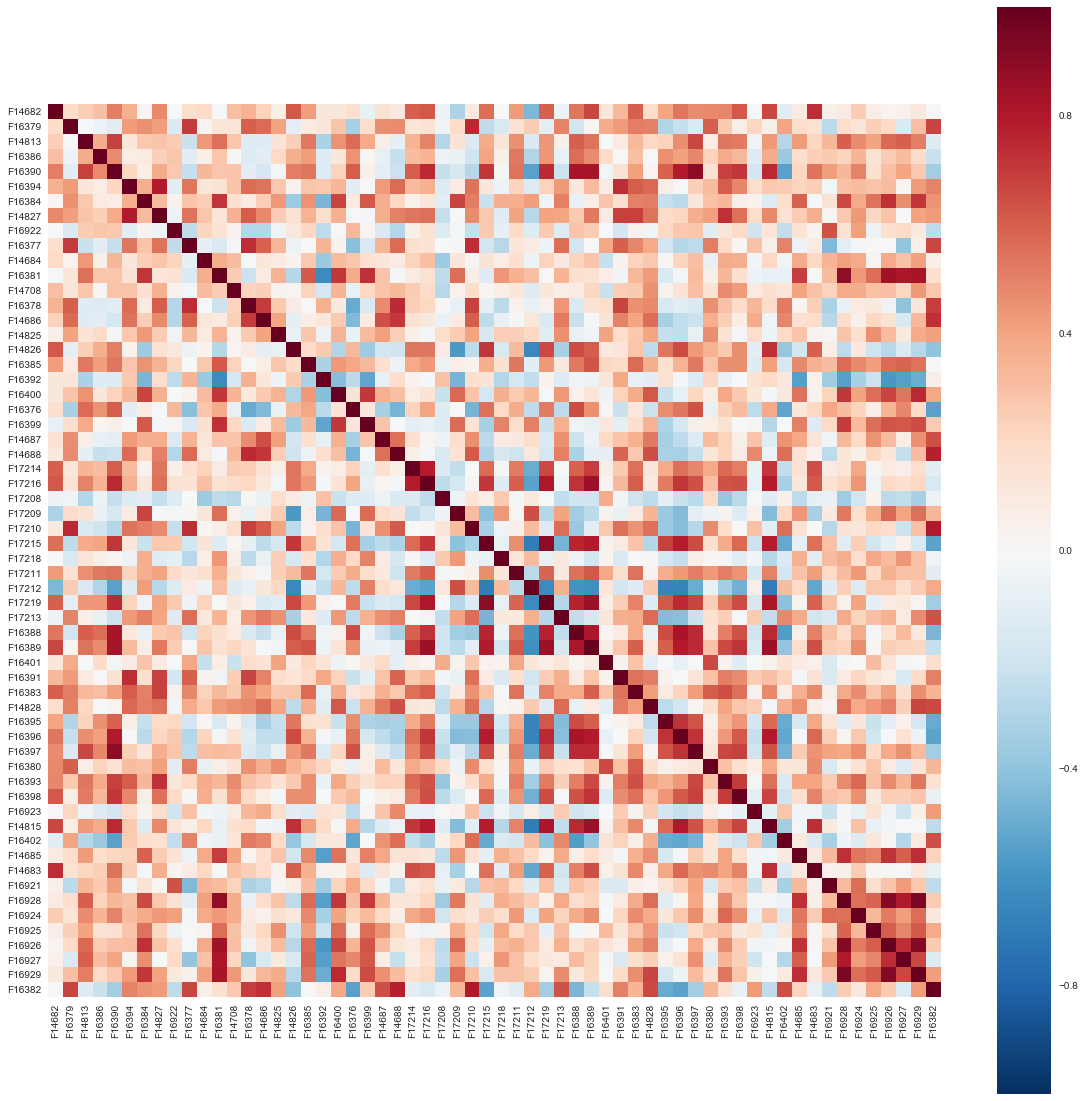

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(part_41_lifestyle_num2.corr(), square=True)

In [22]:
part_41_lifestyle_num2.head(15)

,F14682,F16379,F14813,F16386,F16390,F16394,F16384,F14827,F16922,F16377,F14684,F16381,F14708,F16378,F14686,F14825,F14826,F16385,F16392,F16400,F16376,F16399,F14687,F14688,F17214,F17216,F17208,F17209,F17210,F17215,F17218,F17211,F17212,F17219,F17213,F16388,F16389,F16401,F16391,F16383,F14828,F16395,F16396,F16397,F16380,F16393,F16398,F16923,F14815,F16402,F14685,F14683,F16921,F16928,F16924,F16925,F16926,F16927,F16929,F16382
0,29,88,38,21,44,71,84,54,83,84,80,36,22,78,32,92,20,41,54,55,43,57,13,45,25,11,89,78,88,30,47,59,64,36,80,19,36,96,48,47,31,25,33,27,80,47,69,86,55,91,57,47,70,21,35,48,49,11,44,71
1,44,66,48,4,18,72,88,78,8,72,73,73,68,76,88,82,2,71,24,87,16,67,59,76,5,45,47,76,72,15,19,17,73,5,79,9,49,65,52,58,93,5,32,35,21,47,66,12,15,99,64,18,56,76,45,79,89,54,89,80
2,55,87,21,33,31,83,89,69,78,86,79,45,41,79,89,90,32,41,25,69,25,67,80,66,54,34,94,74,83,32,67,62,70,24,80,16,43,98,42,72,63,16,32,19,85,54,81,56,28,96,67,47,74,35,69,61,69,17,69,79
3,55,62,79,64,63,58,47,78,45,51,59,39,38,83,72,69,43,33,62,73,43,44,50,69,79,80,54,56,64,73,23,28,15,68,33,57,81,63,69,45,50,79,68,62,65,70,78,20,81,73,51,64,67,26,99,29,48,37,50,45
4,81,88,36,32,72,91,88,96,6,97,67,40,35,96,97,88,71,81,28,64,32,43,69,66,92,93,95,50,85,78,52,93,18,86,89,66,94,97,87,95,67,11,67,45,90,78,92,24,88,89,73,89,31,38,99,52,69,15,69,78
5,55,86,21,36,64,72,88,56,56,83,86,43,41,71,89,91,31,55,17,69,24,61,59,48,67,57,91,67,73,44,34,64,54,42,41,39,68,96,35,74,63,16,37,22,81,64,82,11,64,70,59,76,76,35,69,61,71,20,69,74
6,55,87,21,37,39,70,90,67,44,83,79,50,17,76,89,94,28,48,23,68,27,72,59,41,14,28,96,80,84,33,54,50,78,21,80,13,51,95,23,71,63,3,40,17,79,36,60,93,43,94,73,63,67,39,59,56,70,16,70,78
7,71,77,39,9,29,78,87,84,77,69,73,62,82,79,89,36,10,68,33,91,4,78,67,75,69,50,36,69,80,21,33,34,63,14,55,8,62,22,58,77,93,10,49,46,39,58,74,2,45,95,64,64,74,76,65,84,81,45,91,83
8,55,37,67,38,38,41,33,14,17,21,29,47,92,62,50,12,40,67,31,58,13,70,34,44,19,33,89,46,60,28,75,18,81,36,16,40,47,3,76,52,76,2,40,37,21,24,69,43,32,50,64,36,62,66,70,69,56,46,62,43
9,68,28,26,50,48,32,40,9,99,12,25,28,47,40,5,39,64,63,21,43,28,37,18,21,26,43,89,53,47,66,80,40,51,72,25,54,66,5,28,54,39,36,60,52,19,11,64,95,54,23,62,45,99,39,99,46,32,45,32,17


In [23]:
# all these are self reported actual data
# Y = yes, U = unknown
print(part_41_lifestyle_char.head(10))
part_41_lifestyle_char.columns

  F4826 F4817 F4844 F4822 F4856 F4813 F4812 F4821 F4820 F4877 F4878 F4809  \
0     U     U     U     U     U     U     U     U     U     U     U     U   
1     U     U     U     U     U     U     U     U     U     U     U     U   
2     U     U     U     Y     Y     U     U     U     U     U     U     U   
3     U     U     U     U     U     U     U     U     U     U     U     U   
4     Y     U     Y     U     Y     U     U     U     U     U     U     U   
5     U     U     U     U     U     U     U     U     U     U     U     U   
6     U     U     U     Y     U     U     U     U     U     U     U     U   
7     U     U     U     U     U     U     U     U     U     U     U     U   
8     U     U     U     Y     Y     Y     U     Y     U     Y     U     U   
9     Y     Y     U     Y     Y     Y     Y     Y     Y     Y     U     Y   

  F4847 F4819 F4849 F4828 F4857 F4818 F4806 F4868 F4866 F4867 F4875 F4825  \
0     U     U     U     U     U     U     U     U     U     U     U     U  

Index(['F4826', 'F4817', 'F4844', 'F4822', 'F4856', 'F4813', 'F4812', 'F4821',
       'F4820', 'F4877',
       ...
       'F9030', 'F9031', 'F9032', 'F9037', 'F9039', 'F9040', 'F9041', 'F9044',
       'F9161', 'F9167'],
      dtype='object', length=135)

In [51]:
part_41_lifestyle_char2 = part_41_lifestyle_char.replace('Y', 1)
part_41_lifestyle_char2 = part_41_lifestyle_char2.replace('U', 0)
part_41_lifestyle_char2 = part_41_lifestyle_char2.fillna(0.5)
part_41_lifestyle_char2.head(15)

,F4826,F4817,F4844,F4822,F4856,F4813,F4812,F4821,F4820,F4877,F4878,F4809,F4847,F4819,F4849,F4828,F4857,F4818,F4806,F4868,F4866,F4867,F4875,F4825,F4873,F4824,F4830,F4845,F3514,F4870,F4823,F8824,F8827,F8828,F8823,F8830,F8825,F8834,F8835,F8833,F8837,F8836,F8839,F8840,F8841,F8842,F8843,F8856,F8852,F8859,F8855,F8876,F8875,F8868,F8872,F8867,F8877,F8883,F8886,F8888,F8885,F8890,F8892,F8884,F8887,F8897,F8898,F8923,F8900,F8901,F8902,F8903,F8904,F8905,F8906,F8907,F8909,F8910,F8911,F8912,F8915,F8916,F8917,F8918,F8919,F8934,F8936,F8948,F8938,F8952,F8940,F8944,F8945,F8937,F8939,F8954,F8941,F8942,F8961,F8955,F8943,F8946,F8957,F8958,F8949,F8964,F8963,F8962,F8973,F8965,F8967,F8966,F8974,F8971,F8968,F8972,F9015,F9018,F9019,F9020,F9021,F9025,F9026,F9027,F9029,F9030,F9031,F9032,F9037,F9039,F9040,F9041,F9044,F9161,F9167
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0

In [25]:
pca = PCA()
pca.set_params(n_components=None)
pca.fit(part_41_lifestyle_num2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

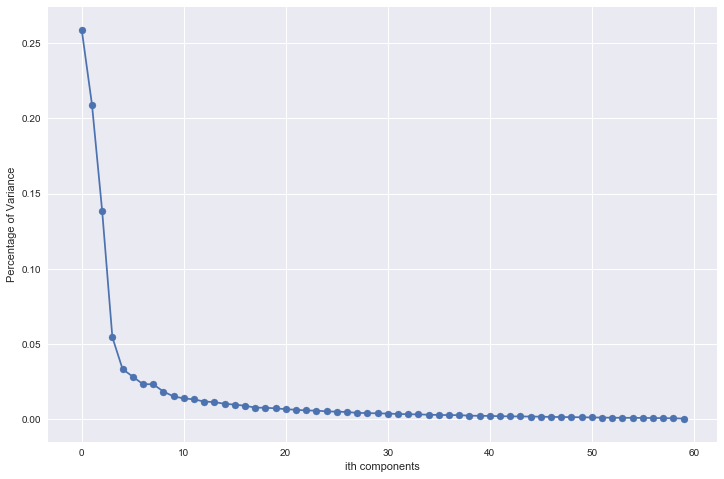

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(range(60), pca.explained_variance_ratio_)
plt.scatter(range(60), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

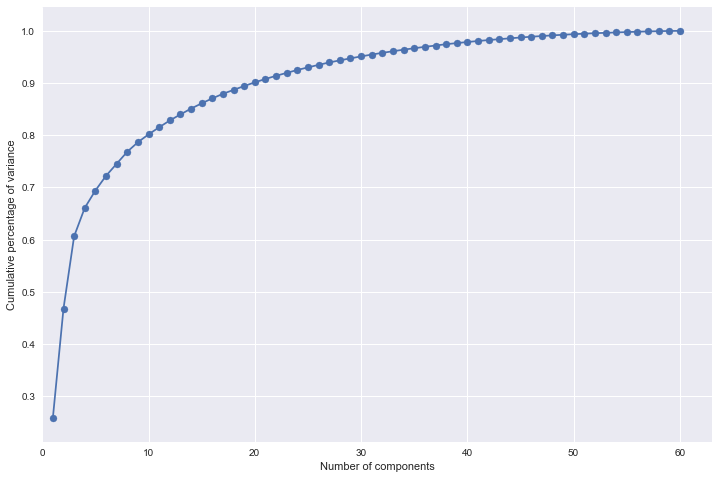

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(range(1, 61), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(1, 61), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 63)
plt.show()

In [28]:
pca.components_[:20]

array([[ 0.1243003 ,  0.00214926,  0.18729907, ...,  0.10703832,
         0.10481431, -0.06291844],
       [ 0.00568337,  0.18112243,  0.04067261, ...,  0.06137908,
         0.19965688,  0.25795719],
       [-0.11544137, -0.13405409,  0.11026303, ...,  0.22311929,
         0.13010751, -0.11302906],
       ..., 
       [ 0.15707304,  0.04158891,  0.08296898, ..., -0.02910415,
         0.03740914,  0.06836012],
       [-0.01714646, -0.02951948,  0.02790036, ..., -0.05072368,
         0.02339091, -0.13224139],
       [ 0.072769  , -0.03738392,  0.12605394, ...,  0.16891023,
         0.11638336, -0.01846443]])

### Heatmap to show priciple components
PC1 capture patterns within:   

                               F16390, Avid Runners
                               F17216, Listens to Alternative Music
                               F17215, Listens to Hip Hop Music
                               F17219, Listens to Pop Music
                               F16388, Music Download
                               F16389, Music Streaming
                               F14815, Video Gamer
                               F16396, Plays Soccer
                               F16397, Plays Tennis
                               F16393, Snow Sports
                               F16398, Sports Enthusiast

PC2 capture patterns within:   
                               
                               F16384, Book Reader
                               F14686, Do-it-yourselfers
                               F17210, Listens to Country Music
                               F14828, Play Golf
                               F16382, Gardening
                               F16929, Hotel Guest Loyalty Program
                               
PC2 capture patterns within:   
                               
                               F16381, Cultural Arts
                               F16927, High Frequency Foreign Vacationer
                               F17218, Jazz Music
                               -F16378, Dog Owners
                               -F16377, Cat Owners

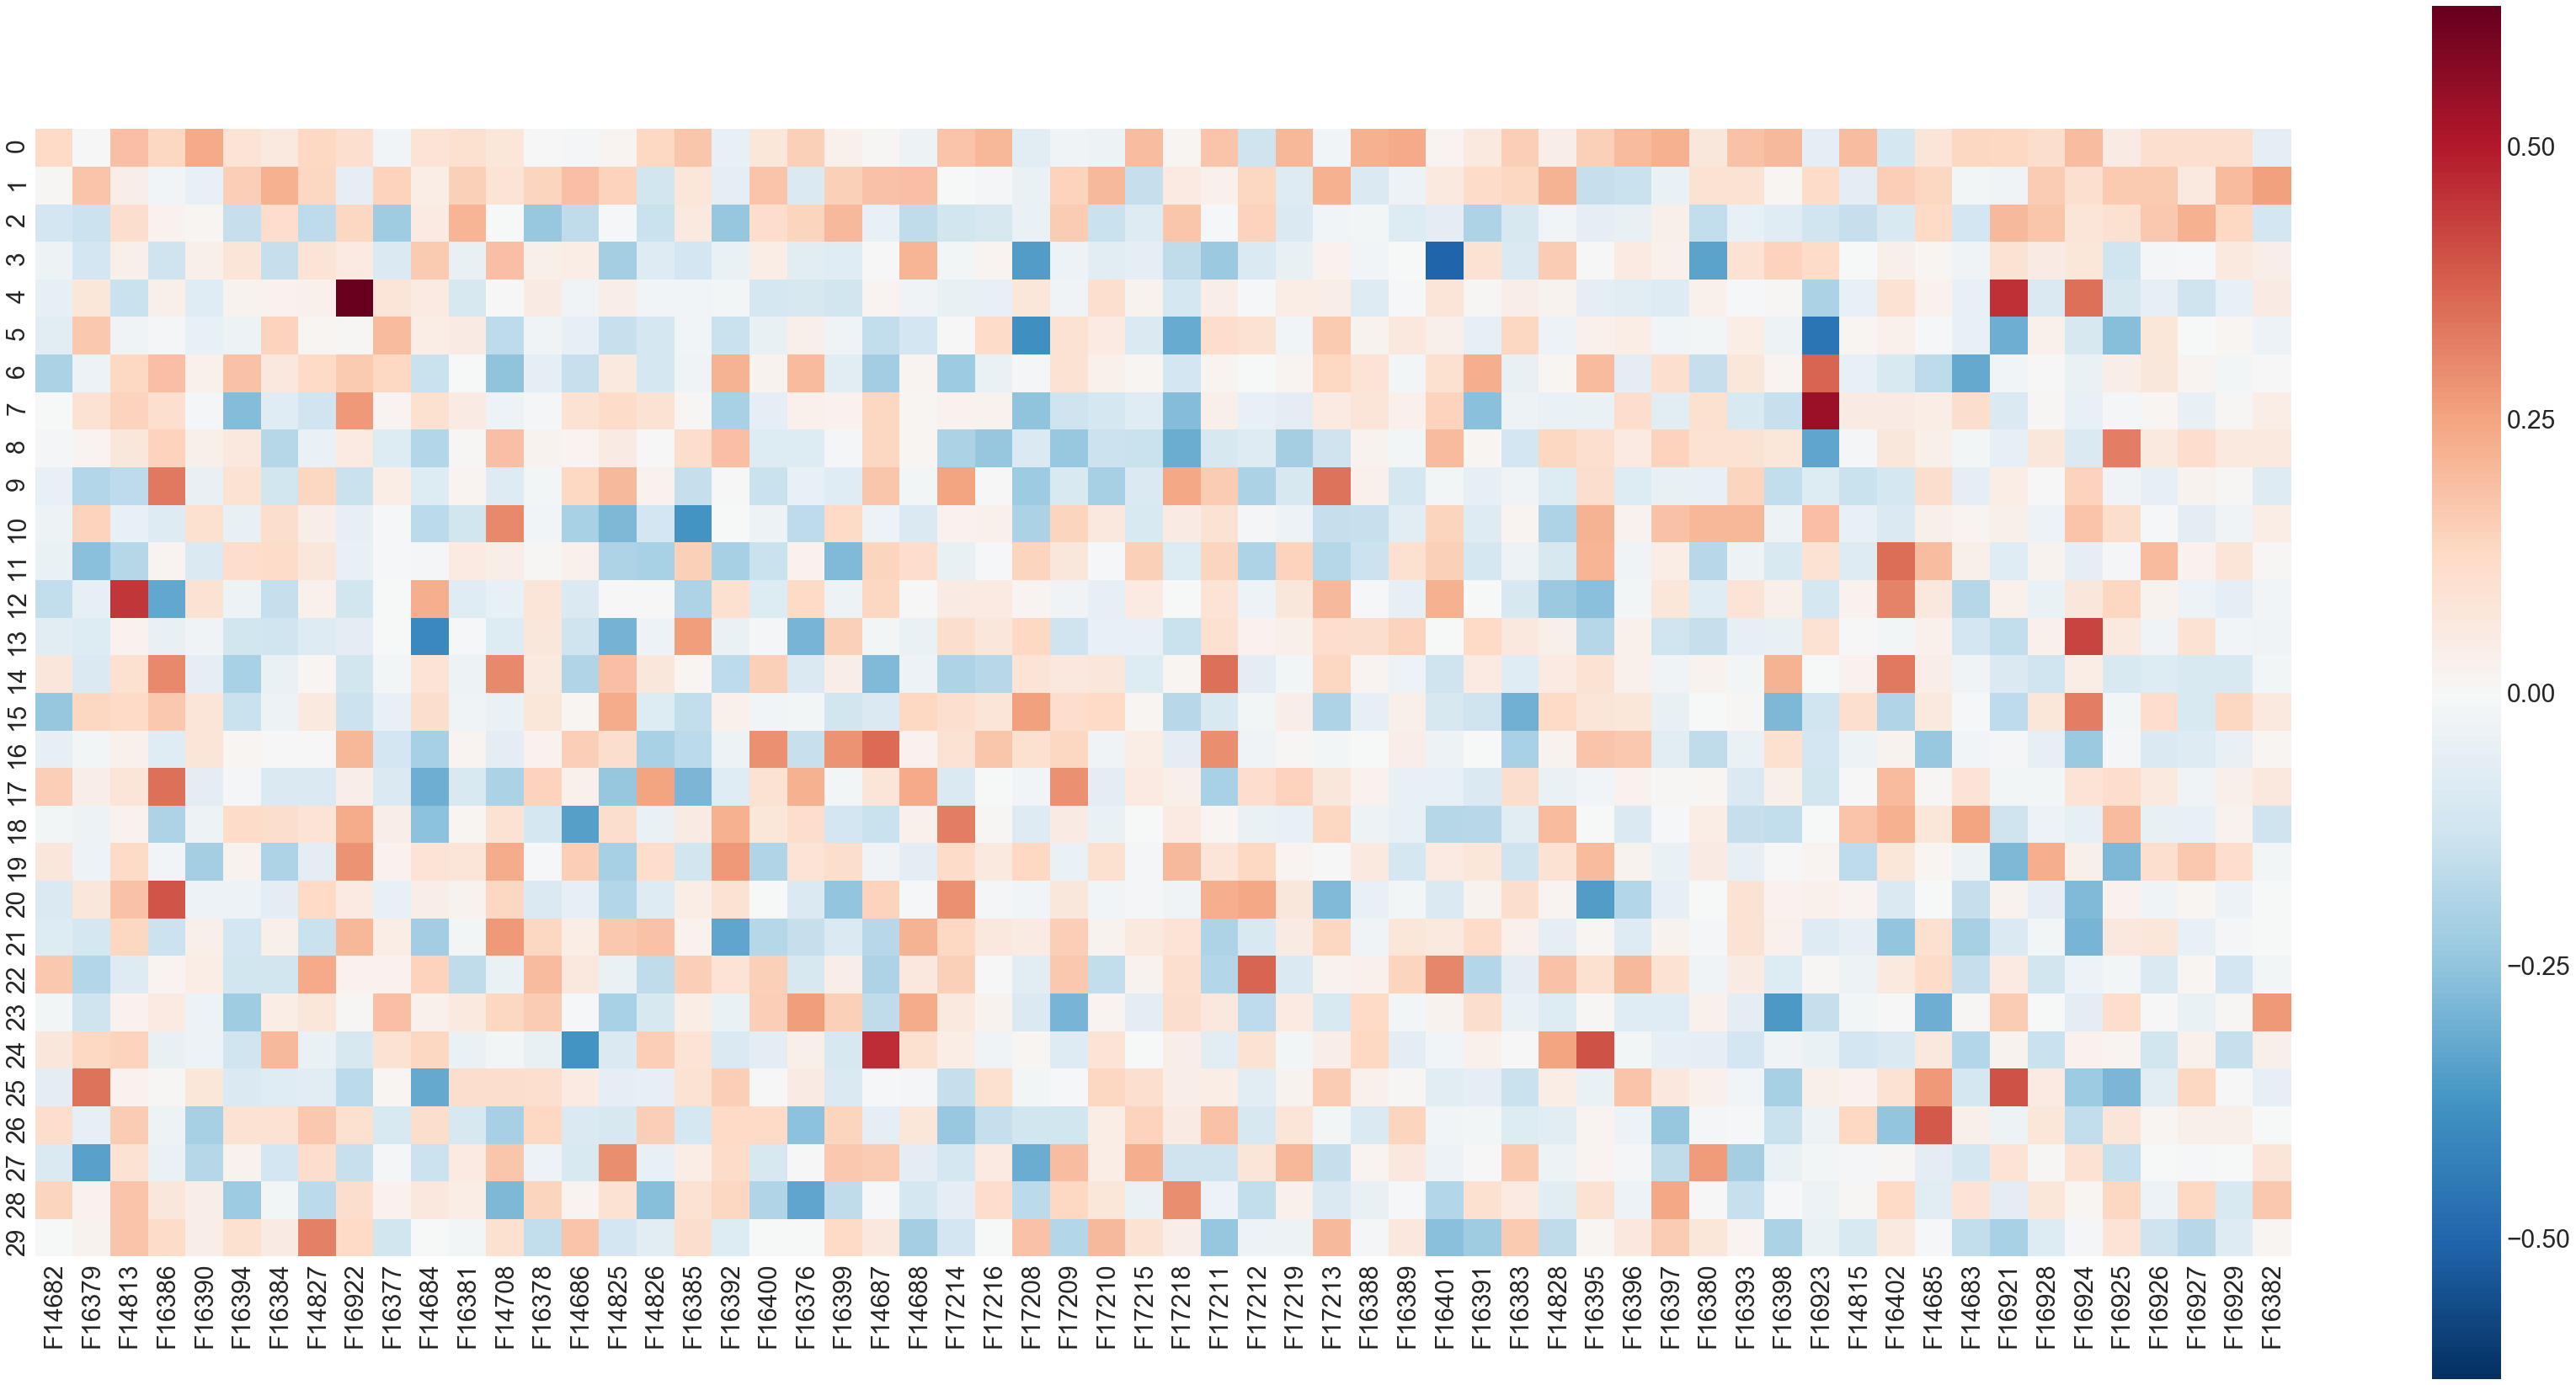

In [29]:
n_components_to_show = min(30, pca.n_components_)
n_input_features = pca.components_.shape[1]

decomp_df = pd.DataFrame(pca.components_[0:n_components_to_show],
                            columns=part_41_lifestyle_num2.columns)
# if decomp_df.shape[1] > 50:
#     decomp_df = decomp_df[decomp_df.columns[0:50]]

fig = plt.figure(figsize=(n_input_features, n_components_to_show))
sns.set(font_scale=3)
sns.heatmap(decomp_df, square=True)
sns.set(font_scale=1)

### transform data into principle components
choosing n_components=10, which explains 80% of total variance in lifestyle

In [30]:
pca.set_params(n_components=10)
part_41_lifestyle_num_pca = pca.fit_transform(part_41_lifestyle_num2)

In [31]:
pca_df=pd.DataFrame(part_41_lifestyle_num_pca)
pca_df.head(20)

,0,1,2,3,4,5,6,7,8,9
0,-55.069911,59.925018,8.392990,-51.205795,47.372259,8.959554,45.761820,15.288126,-35.448764,-45.486664
1,-55.318410,157.987897,66.149752,40.406294,-19.430698,47.354329,-15.910100,-35.437934,38.769454,-30.902581
2,-25.560453,133.299119,8.578052,-44.815639,59.609208,-3.688953,-22.296030,3.593329,-25.485360,-4.183470
3,85.023376,-3.264853,-31.383376,21.997855,10.075323,12.731896,-3.808771,-16.005053,2.589665,-1.373889
4,118.994034,109.597243,-94.591662,-57.104586,-0.944342,26.551209,-52.915938,-28.858575,-42.684754,2.618677
5,29.290052,83.880250,3.816425,-49.661228,44.054377,26.233220,-54.578656,-8.180864,-10.207963,-24.670014
6,-47.717187,123.973118,19.779379,-55.335068,23.446678,-3.341480,-9.740279,31.966669,-40.307302,-27.922070
7,12.310970,142.813157,41.512177,69.153836,27.967566,37.607939,-64.694050,-35.161534,24.279714,-39.419446
8,-37.000359,13.776004,85.226705,49.476946,-36.783355,-43.989781,-42.085875,-51.746443,12.160423,-52.110614
9,13.762051,-89.753137,89.355574,20.288510,37.899906,-65.642906,-0.964347,6.447094,-55.342711,-29.035503


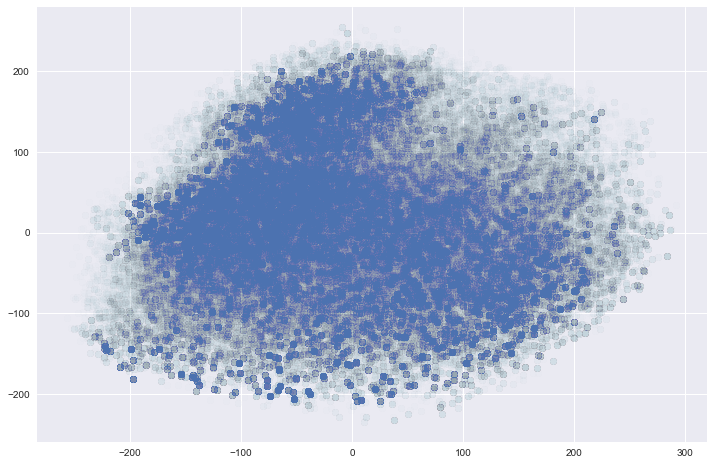

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_df[0], pca_df[1], alpha=0.008)

### kmean on the lifestyle features

In [33]:
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
        print("finished {}th iteration".format(i))
    plt.figure(figsize=(12, 8))
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

finished 1th iteration
finished 2th iteration
finished 3th iteration
finished 4th iteration
finished 5th iteration
finished 6th iteration
finished 7th iteration
finished 8th iteration
finished 9th iteration
finished 10th iteration
finished 11th iteration
finished 12th iteration
finished 13th iteration
finished 14th iteration
finished 15th iteration
finished 16th iteration
finished 17th iteration
finished 18th iteration
finished 19th iteration


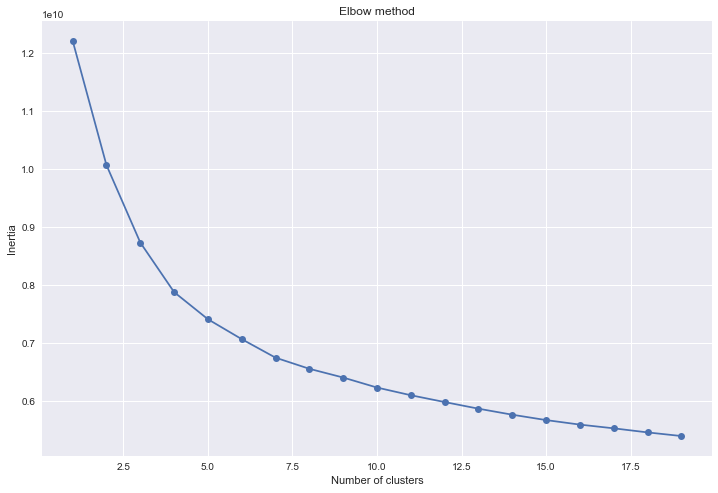

In [34]:
kmeans = KMeans(n_jobs=-1)
plot_inertia(kmeans, part_41_lifestyle_num2, range(1, 20))

In [35]:
kmeans.set_params(n_clusters=6)
kmeans.fit(part_41_lifestyle_num2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
kmeans.labels_

array([1, 1, 1, ..., 2, 4, 4])

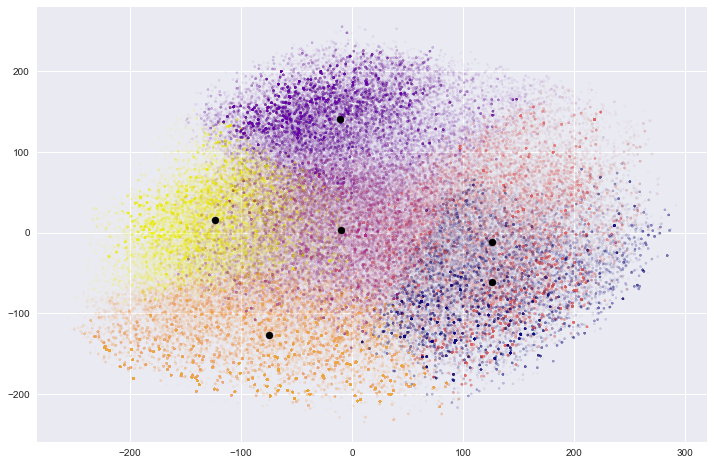

In [37]:
cluster_center = pd.DataFrame(pca.transform(kmeans.cluster_centers_))

plt.figure(figsize=(12, 8))
plt.scatter(pca_df[0], pca_df[1], c=kmeans.labels_, alpha=0.03, cmap='plasma', s=5)
plt.scatter(cluster_center[0], cluster_center[1], c='k', s=50)

In [38]:
pd.DataFrame(pca.transform(kmeans.cluster_centers_))

,0,1,2,3,4,5,6,7,8,9
0,125.684684,-60.951698,73.996736,-1.965973,-5.032620,-11.558115,-7.872480,6.881336,-2.595712,-2.148457
1,-11.056411,140.814308,-10.014197,3.125171,3.378779,21.453996,4.957654,-0.746468,-3.148301,-0.529245
2,-9.703252,2.780569,66.371594,-1.304841,-0.105270,-4.142674,-0.525584,-2.250786,2.583869,-0.923818
3,125.913922,-12.013677,-82.430642,4.378633,5.132436,-2.193643,3.065739,-5.110231,-3.282575,5.547701
4,-75.180099,-126.719512,-14.040498,-5.877961,-2.145280,19.894257,6.504442,1.930180,2.290558,-2.652576
5,-123.108087,15.351425,-40.190361,0.722025,-3.208250,-23.792020,-7.828932,2.734958,2.680773,0.079361


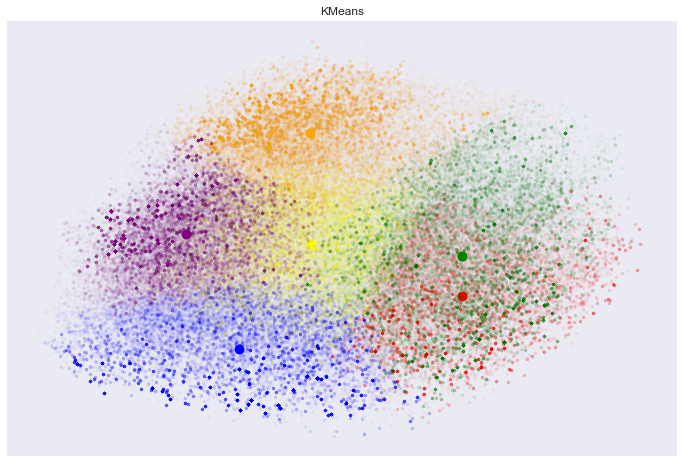

In [39]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
n_clusters = 6
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
cluster_center = pd.DataFrame(pca.transform(kmeans.cluster_centers_))
for k, col in zip(range(n_clusters), colors):
    my_members = kmeans.labels_ == k
    ax.plot(pca_df[0][my_members], pca_df[1][my_members], 'w',
            markerfacecolor=col, marker='.', alpha = 0.02)
    ax.plot(cluster_center[0][k], cluster_center[1][k], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=10)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [47]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(pca_df[0], pca_df[1], pca_df[2], c=kmeans.labels_)


finished 1th iteration
finished 2th iteration
finished 3th iteration
finished 4th iteration
finished 5th iteration
finished 6th iteration
finished 7th iteration
finished 8th iteration
finished 9th iteration
finished 10th iteration
finished 11th iteration
finished 12th iteration
finished 13th iteration
finished 14th iteration
finished 15th iteration
finished 16th iteration
finished 17th iteration
finished 18th iteration
finished 19th iteration


<IPython.core.display.Javascript object>


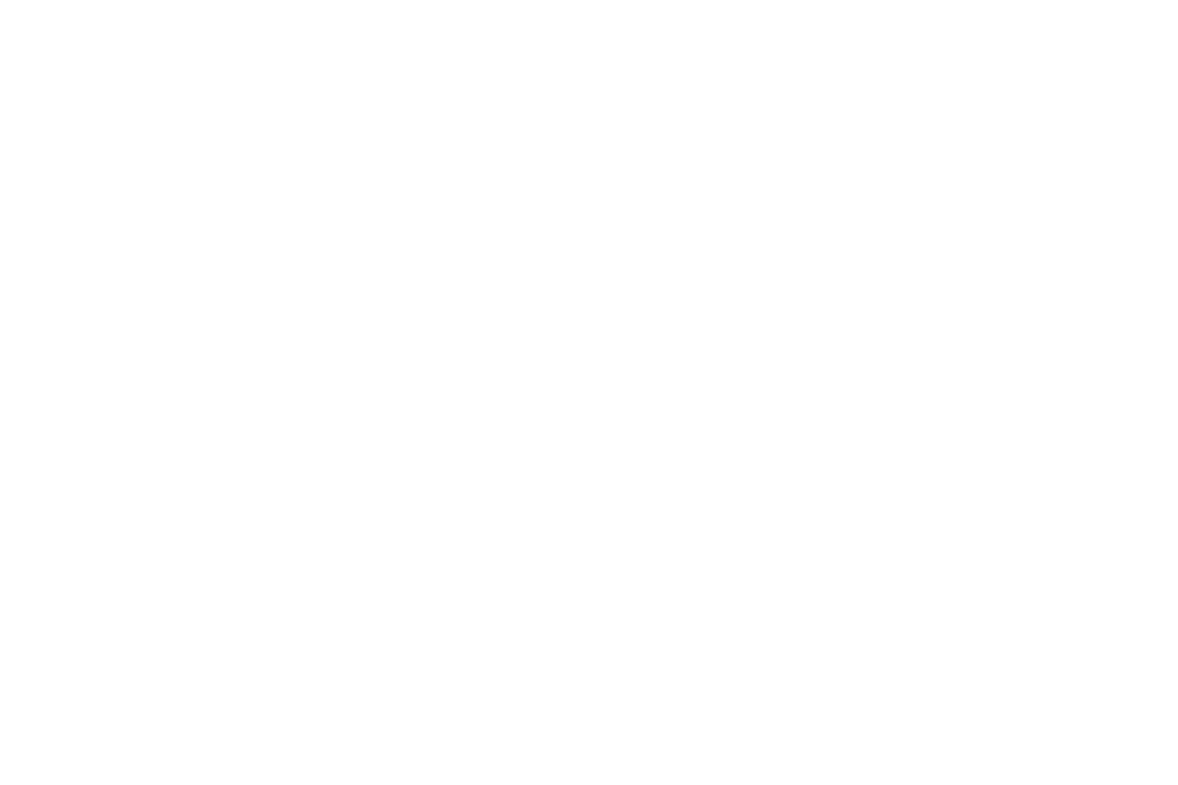

<IPython.core.display.Javascript object>


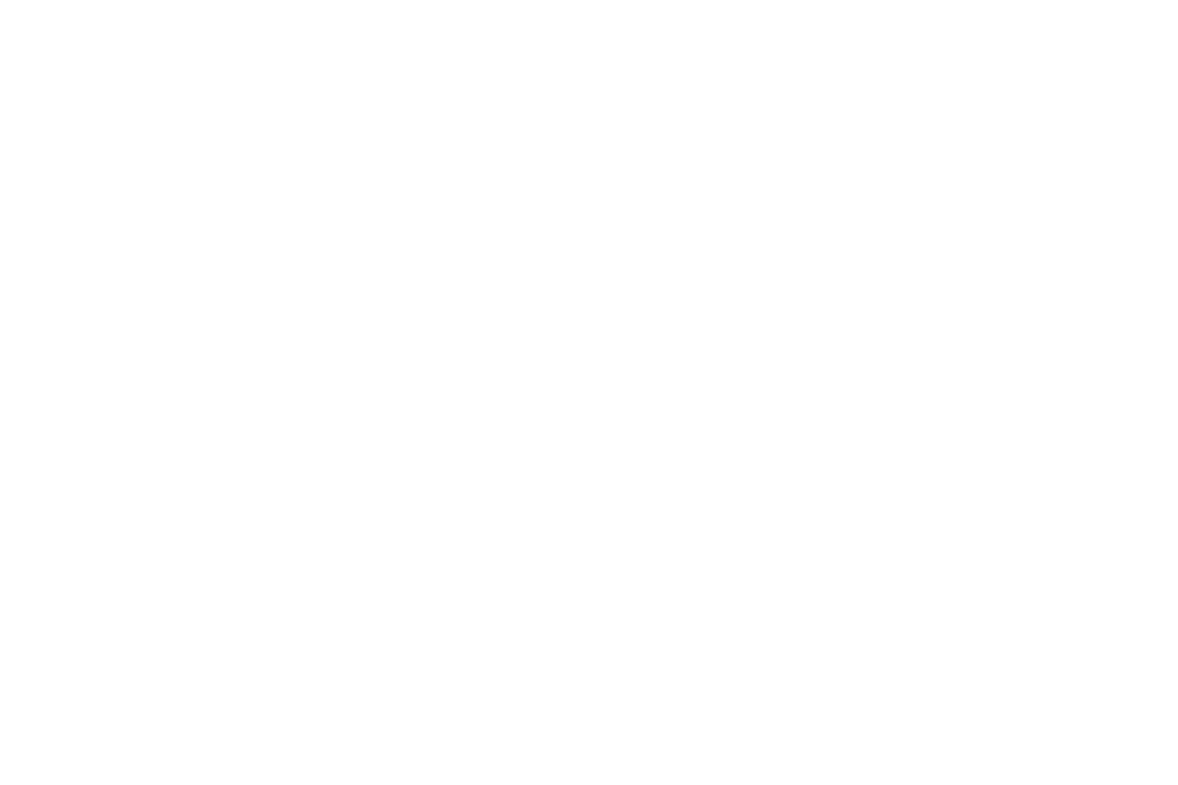

In [41]:
minibatchkmeans = MiniBatchKMeans()
plot_inertia(minibatchkmeans, part_41_lifestyle_num2, range(1, 20))

In [48]:
minibatchkmeans.set_params(n_clusters=6)
minibatchkmeans.fit(part_41_lifestyle_num2)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=6,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

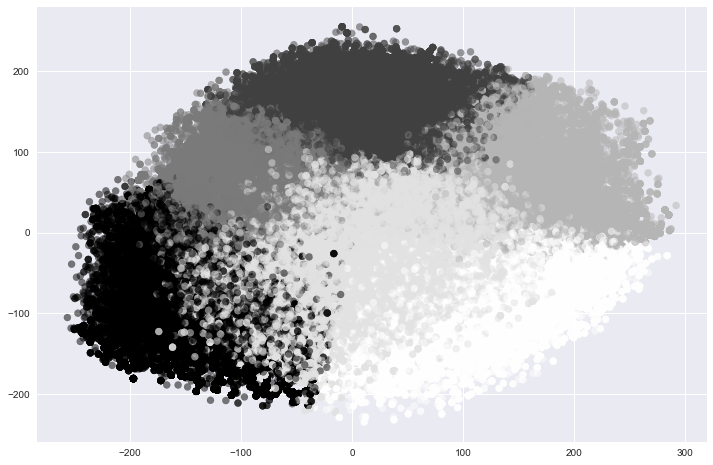

In [49]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_df[0], pca_df[1], c=minibatchkmeans.labels_, alpha=0.5)

### Heatmap of categorical features
small amount of known value, mostly unknown and missing values, the major pattern is the missingness pattern

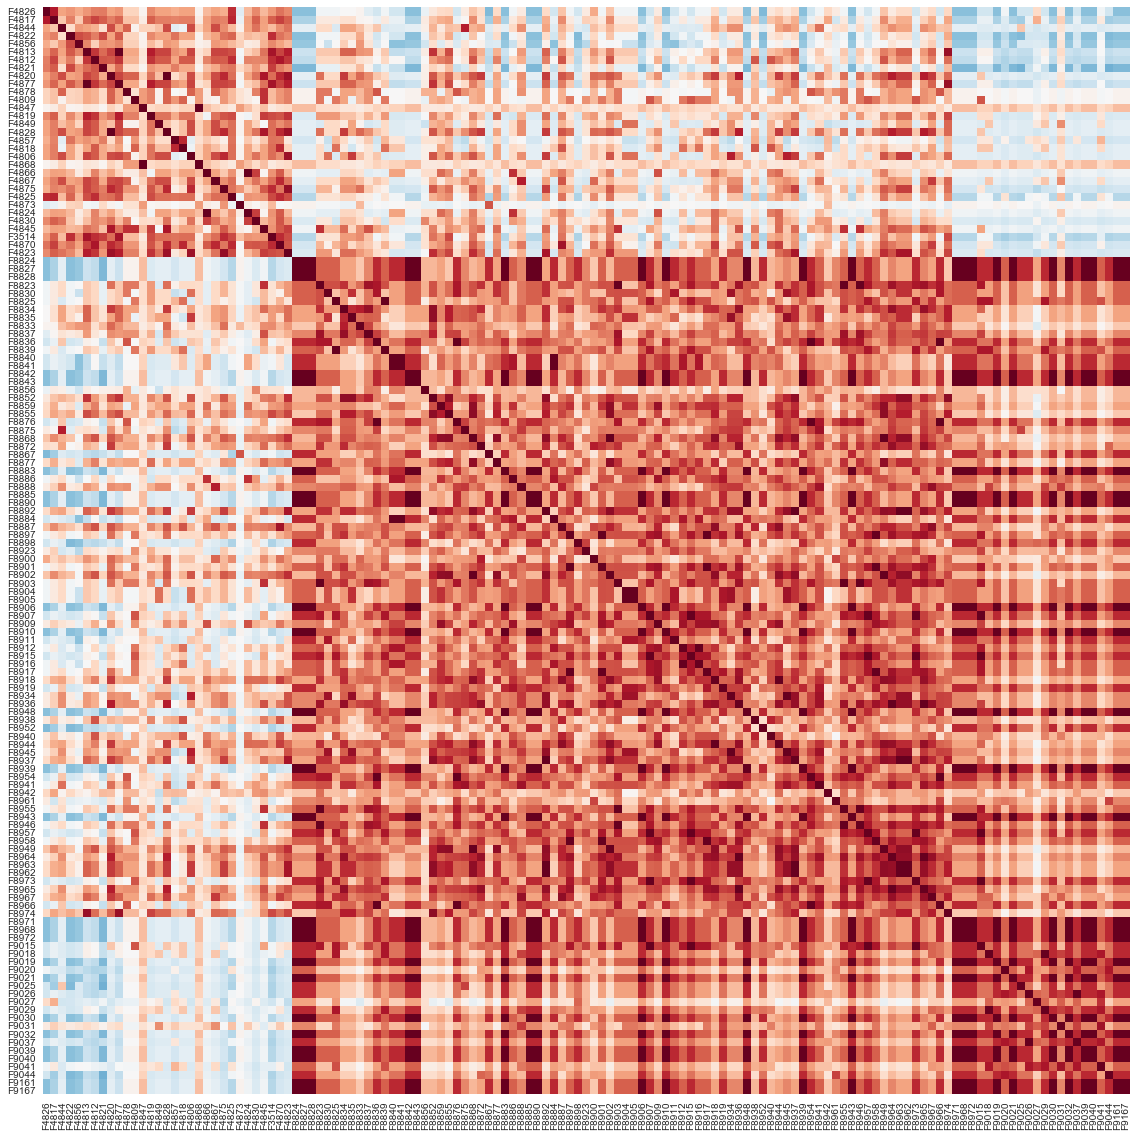

In [56]:
plt.figure(figsize=(20, 20))
sns.heatmap(part_41_lifestyle_char2[0:31].corr(), square=True, cbar=False)

In [53]:
pca_c = PCA()
pca_c.set_params(n_components=None)
pca_c.fit(part_41_lifestyle_char2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

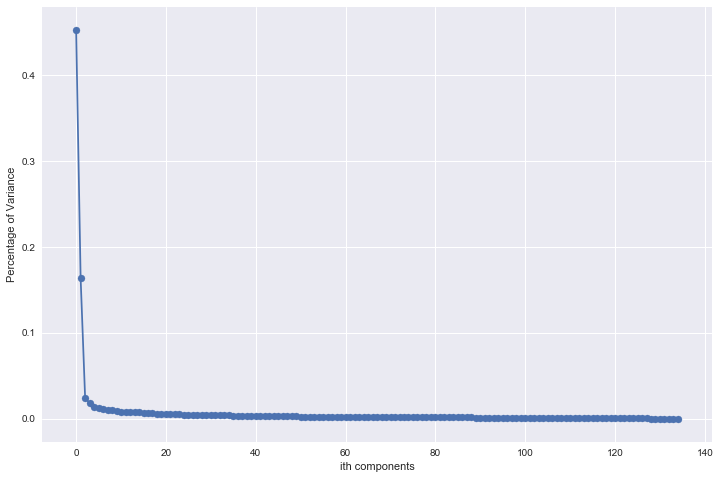

In [54]:
plt.figure(figsize=(12, 8))
plt.plot(range(135), pca_c.explained_variance_ratio_)
plt.scatter(range(135), pca_c.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

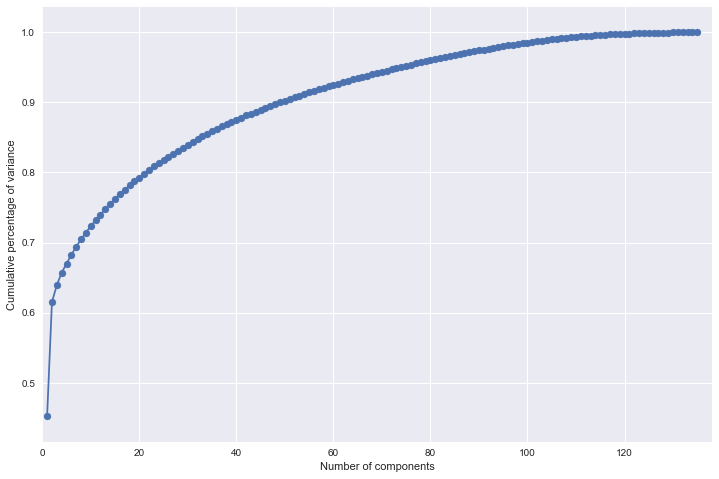

In [327]:
plt.figure(figsize=(12, 8))
plt.scatter(range(1, 136), np.cumsum(pca_c.explained_variance_ratio_))
plt.plot(range(1, 136), np.cumsum(pca_c.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 138)
plt.show()

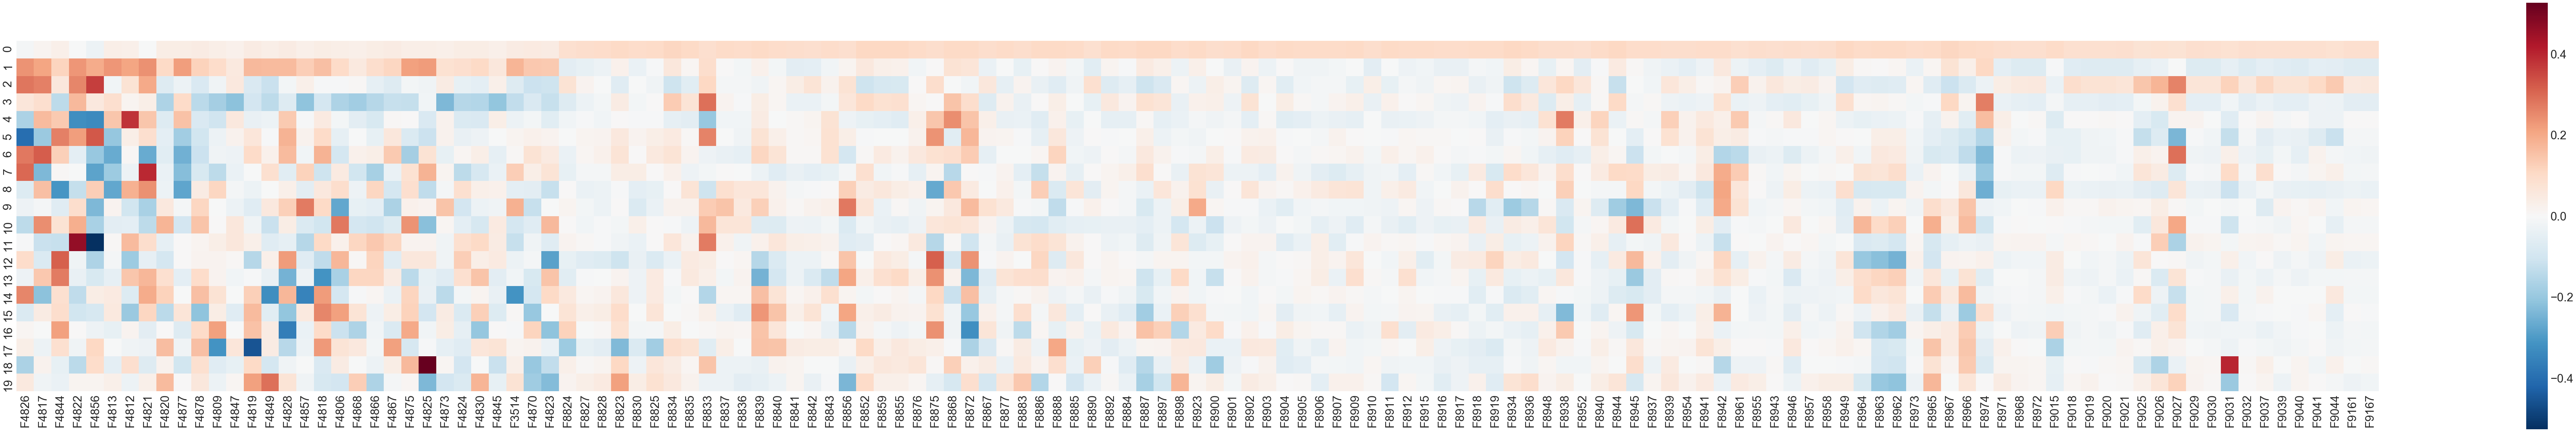

In [333]:
n_components_to_show = min(20, pca_c.n_components_)
n_input_features = pca_c.components_.shape[1]

decomp_df = pd.DataFrame(pca_c.components_[0:n_components_to_show],
                            columns=part_41_lifestyle_char2.columns)
# if decomp_df.shape[1] > 50:
#     decomp_df = decomp_df[decomp_df.columns[0:50]]

fig = plt.figure(figsize=(n_input_features, n_components_to_show))
sns.set(font_scale=3)
sns.heatmap(decomp_df, square=True)
sns.set(font_scale=1)

In [335]:
pca_c.components_[:6]

array([[ -1.14216250e-02,   1.59263198e-02,   3.15460851e-02,
         -3.65495380e-03,  -3.10325936e-02,   3.62023817e-02,
          3.23952707e-02,  -1.01226353e-03,   3.92214911e-02,
          3.85687989e-02,   4.15890488e-02,   3.66132592e-02,
          2.72397063e-02,   4.32175207e-02,   3.42255137e-02,
          4.13581965e-02,   3.21491257e-02,   3.99664075e-02,
          3.48213798e-02,   2.98636774e-02,   3.95081097e-02,
          4.16608248e-02,   3.67959007e-02,   3.48880960e-02,
          3.00374173e-02,   3.84740830e-02,   3.90540535e-02,
          3.01592436e-02,   4.20609927e-02,   4.67964695e-02,
          4.40275738e-02,   8.61647453e-02,   9.37841708e-02,
          9.70236234e-02,   1.04873763e-01,   9.59905271e-02,
          9.97232021e-02,   1.11082862e-01,   1.04741920e-01,
          8.74749864e-02,   9.98553054e-02,   9.85021189e-02,
          1.03443514e-01,   9.75050490e-02,   9.14879269e-02,
          8.89570256e-02,   9.69606681e-02,   8.73729804e-02,
        

### trying to see the relationship of numeric columns  and categorical columns on the same subject
choosing F4873(Interest in photography), F16383(households likelihood to be interested in photography), F1009 and F8867 as an example


In [71]:
photography = pd.concat([part_41_lifestyle_num2['F16383'],\
                        part_41_lifestyle_char2['F4873'],\
                        part_41['F1009'],\
                        part_41_lifestyle_char2['F8867']], axis=1)
photography.head(15)

,F16383,F4873,F1009,F8867
0,47,0.0,0,0.0
1,58,0.0,0,0.0
2,72,0.0,0,0.0
3,45,0.0,0,0.0
4,95,0.0,0,0.0
5,74,0.0,0,0.0
6,71,0.0,0,0.0
7,77,0.0,0,0.0
8,52,0.0,0,0.0
9,54,0.0,0,0.0


In [164]:
videogame = pd.concat([part_41_lifestyle_num2['F14815'],\
                      part_41['F9013']],axis=1)
videogame

,F14815,F9013
0,55,NaN
1,15,NaN
2,28,U
3,81,NaN
4,88,U
5,64,NaN
6,43,U
7,45,NaN
8,32,Y
9,54,U


### apparently no correlation between modeled number and actual data

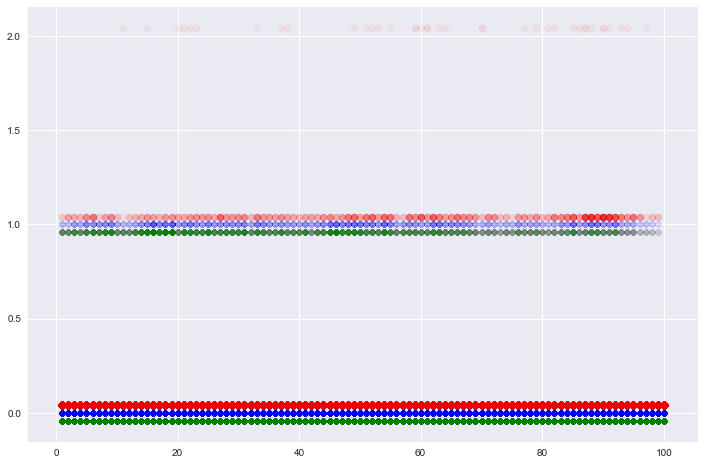

In [118]:
plt.figure(figsize=(12,8))
plt.scatter(photography['F16383'], photography['F4873']-0.04, c='green', alpha=0.005)
plt.scatter(photography['F16383'], photography['F1009']+0.04, c='red', alpha=0.05)
plt.scatter(photography['F16383'], photography['F8867'], c='blue', alpha=0.005)
plt.show()

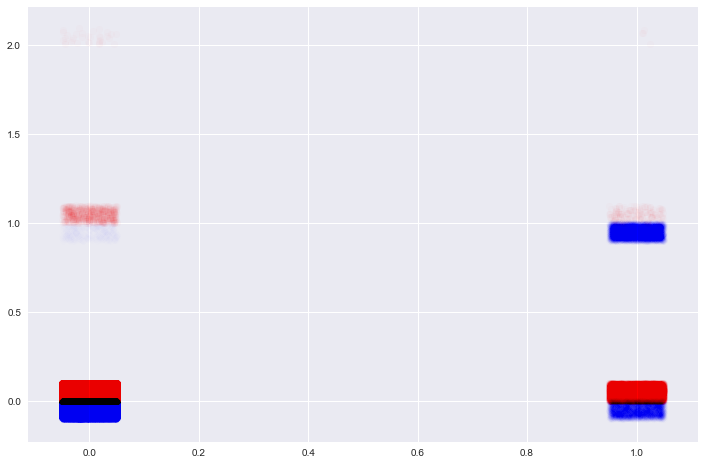

In [126]:
plt.figure(figsize=(12,8))
plt.scatter(photography['F4873']+(np.random.random(photography.shape[0])-0.5)*0.1,\
            photography['F1009']+0.05+(np.random.random(photography.shape[0])-0.5)*0.1,\
            c='red', alpha=0.01)
plt.scatter(photography['F4873']+(np.random.random(photography.shape[0])-0.5)*0.1,\
            photography['F8867']-0.05+(np.random.random(photography.shape[0])-0.5)*0.1,\
            c='blue', alpha=0.003)
plt.show()

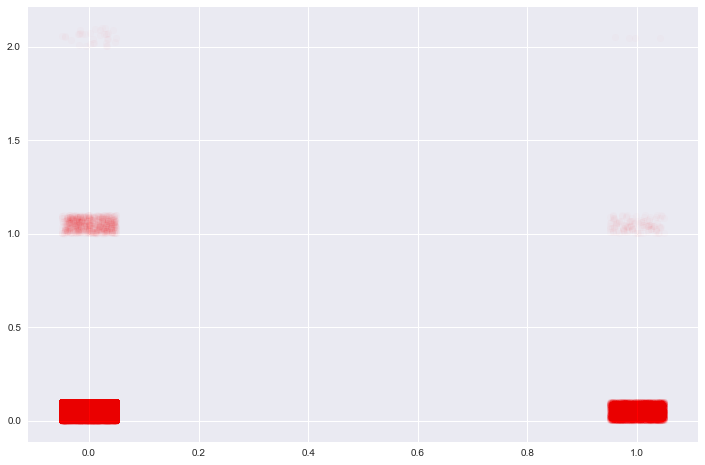

In [127]:
plt.figure(figsize=(12,8))
plt.scatter(photography['F8867']+(np.random.random(photography.shape[0])-0.5)*0.1,\
            photography['F1009']+0.05+(np.random.random(photography.shape[0])-0.5)*0.1,\
            c='red', alpha=0.01)
plt.show()

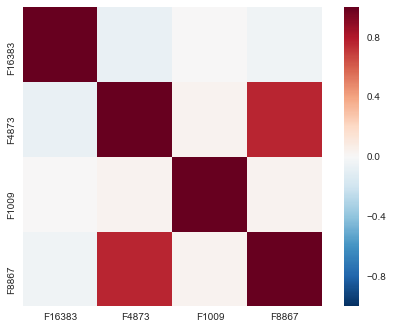

In [133]:
sns.heatmap(photography.corr(), center=0,square=True)

In [67]:
# photography['F4873'] = photography['F4873'].replace
# photography[0] = photography[0].replace('U', 0)
# photography[0] = photography[0].fillna(0)
print(photography)

        F16383  F4873
0           47    0.0
1           58    0.0
2           72    0.0
3           45    0.0
4           95    0.0
5           74    0.0
6           71    0.0
7           77    0.0
8           52    0.0
9           54    0.0
10          51    0.0
11         100    0.0
12          18    0.0
13          98    0.0
14          39    0.0
15          17    0.0
16          22    0.0
17          52    0.0
18          68    0.0
19          64    0.0
20          46    0.0
21          78    0.0
22          74    0.0
23          67    0.0
24          66    0.0
25          13    0.0
26          67    0.0
27          22    1.0
28          22    0.0
29          17    0.0
...        ...    ...
292260      65    1.0
292261      68    0.0
292262      75    0.0
292263      95    0.0
292264      57    0.0
292265      50    0.0
292266     100    0.0
292267      31    0.0
292268      62    0.0
292269      38    0.0
292270      94    0.0
292271      46    0.0
292272      66    0.0
292273    

## PCA on media columns

In [27]:
media = verticals[verticals[1]=='media'][0]
media

505     F9221
506     F9222
659    F16958
660    F16959
661    F19395
662    F16961
663    F16962
664    F16963
665    F16964
666    F16965
667    F16966
668    F16967
669    F16968
670    F16969
671    F16970
672    F16971
673    F16972
Name: 0, dtype: object

In [165]:
part_41_media = part_41[media]
part_41_media.dtypes

F9221     object
F9222     object
F16958     int64
F16959     int64
F19395     int64
F16961     int64
F16962     int64
F16963     int64
F16964     int64
F16965     int64
F16966     int64
F16967     int64
F16968     int64
F16969     int64
F16970     int64
F16971     int64
F16972     int64
dtype: object

In [166]:
part_41_media_num = part_41_media.select_dtypes(['number'])
print("numeric columns: {}".format(part_41_media_num.shape))

numeric columns: (292290, 15)


In [167]:
part_41_media_num.head(15)

,F16958,F16959,F19395,F16961,F16962,F16963,F16964,F16965,F16966,F16967,F16968,F16969,F16970,F16971,F16972
0,5,7,7,4,6,6,5,7,3,3,3,4,3,6,5
1,4,7,4,4,5,6,6,7,5,5,3,5,5,4,5
2,4,8,7,4,5,6,6,7,5,5,3,4,5,6,5
3,6,6,4,5,7,7,7,7,7,5,3,2,5,6,8
4,8,6,8,8,8,9,7,9,7,6,8,6,7,8,8
5,4,8,7,4,5,6,6,7,5,5,3,4,5,6,5
6,4,7,6,3,5,6,7,7,3,4,5,6,4,5,5
7,5,7,4,5,6,6,6,7,5,5,7,4,5,5,7
8,4,3,4,6,7,3,1,3,5,7,5,6,5,4,5
9,6,7,9,5,6,3,3,3,5,4,3,7,6,4,2


In [168]:
part_41_media_num.isnull().values.any()

False

In [170]:
part_41_media_num2 = part_41_media_num.replace(0, 5)
# part_41_media_num_scaled = part_41_media_num2 / np.std(part_41_media_num2, 0)
part_41_media_num2.head(15)

,F16958,F16959,F19395,F16961,F16962,F16963,F16964,F16965,F16966,F16967,F16968,F16969,F16970,F16971,F16972
0,5,7,7,4,6,6,5,7,3,3,3,4,3,6,5
1,4,7,4,4,5,6,6,7,5,5,3,5,5,4,5
2,4,8,7,4,5,6,6,7,5,5,3,4,5,6,5
3,6,6,4,5,7,7,7,7,7,5,3,2,5,6,8
4,8,6,8,8,8,9,7,9,7,6,8,6,7,8,8
5,4,8,7,4,5,6,6,7,5,5,3,4,5,6,5
6,4,7,6,3,5,6,7,7,3,4,5,6,4,5,5
7,5,7,4,5,6,6,6,7,5,5,7,4,5,5,7
8,4,3,4,6,7,3,1,3,5,7,5,6,5,4,5
9,6,7,9,5,6,3,3,3,5,4,3,7,6,4,2


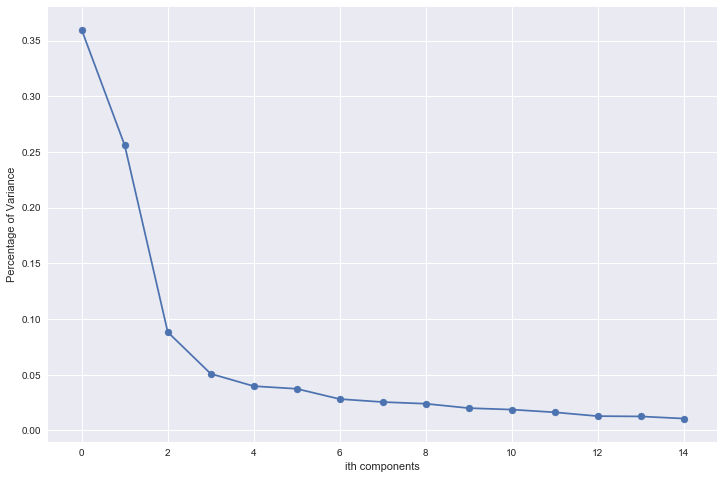

In [175]:
pca_media = PCA()
pca_media.set_params(n_components=None)
pca_media.fit(part_41_media_num2)

plt.figure(figsize=(12, 8))
plt.plot(range(15), pca_media.explained_variance_ratio_)
plt.scatter(range(15), pca_media.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

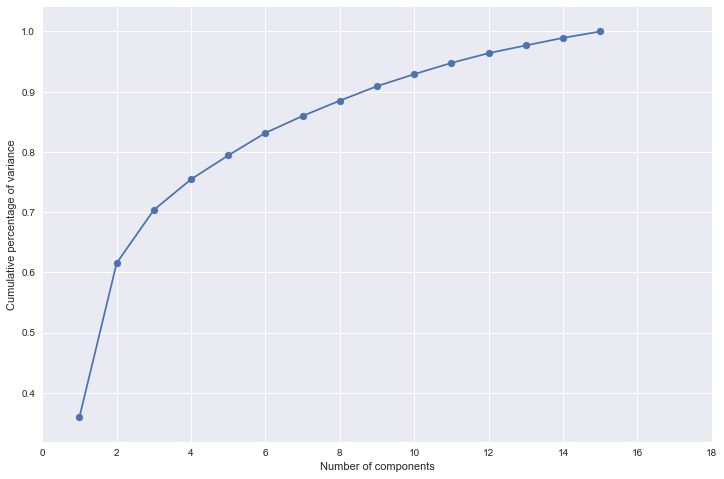

In [176]:
plt.figure(figsize=(12, 8))
plt.scatter(range(1, 16), np.cumsum(pca_media.explained_variance_ratio_))
plt.plot(range(1, 16), np.cumsum(pca_media.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 18)
plt.show()

In [177]:
pca_media.components_

array([[ 0.2512675 , -0.16393605,  0.18433155,  0.34716219,  0.20697654,
         0.18952402,  0.21878437,  0.22736969,  0.37915978,  0.26358753,
         0.38286267,  0.14894325,  0.24175288,  0.28731344,  0.23273544],
       [ 0.27172815,  0.21165855,  0.28738904, -0.02155742, -0.23633975,
        -0.26649133, -0.38773718, -0.48512429, -0.05390964,  0.22922835,
        -0.01405132,  0.29150238,  0.35114693,  0.1356717 ,  0.0584256 ],
       [ 0.08076546, -0.45041513, -0.44590414,  0.12284674,  0.04513441,
        -0.03761367, -0.16048268, -0.38695283,  0.07960932,  0.13927358,
        -0.08213881, -0.54182349,  0.17167135,  0.09711995,  0.18106531],
       [-0.06679585, -0.50609223, -0.23576405,  0.03498422,  0.13067435,
        -0.09623836,  0.0151871 , -0.29102325,  0.05162841, -0.13304326,
         0.14984369,  0.66639144, -0.17343474, -0.22274275, -0.06889825],
       [ 0.16836916, -0.41080211, -0.04282215, -0.14422891, -0.20951649,
        -0.28931103, -0.40646273,  0.6521083 , 

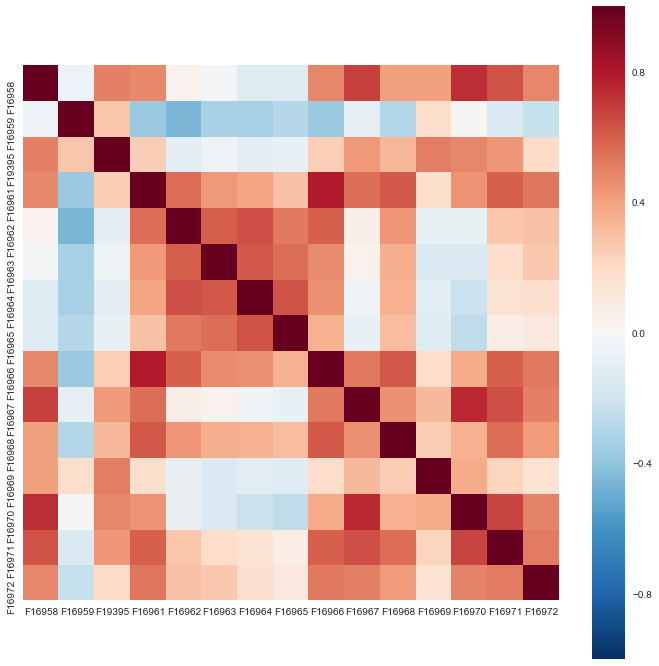

In [182]:
plt.figure(figsize=(12, 12))
sns.heatmap(part_41_media_num2.corr(), square=True)

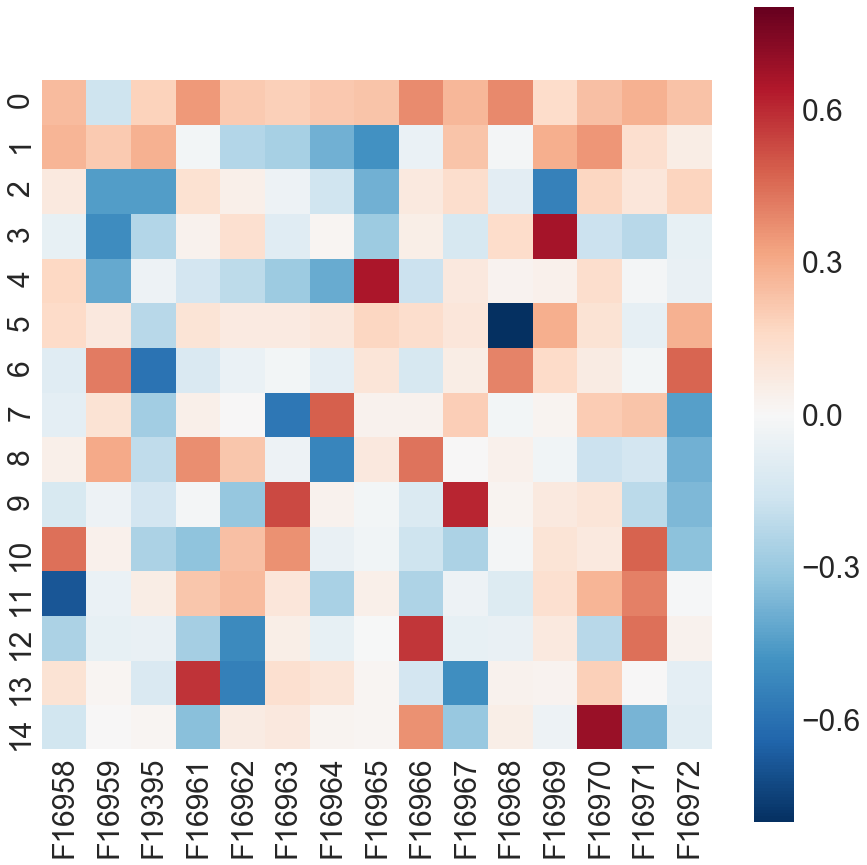

In [179]:
n_components_to_show = min(30, pca_media.n_components_)
n_input_features = pca_media.components_.shape[1]

decomp_df = pd.DataFrame(pca_media.components_[0:n_components_to_show],
                            columns=part_41_media_num2.columns)
# if decomp_df.shape[1] > 50:
#     decomp_df = decomp_df[decomp_df.columns[0:50]]

fig = plt.figure(figsize=(n_input_features, n_components_to_show))
sns.set(font_scale=3)
sns.heatmap(decomp_df, square=True)
sns.set(font_scale=1)